In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import gaussian
from scipy.signal import convolve2d
from scipy.fftpack import fft2, ifft2, fftshift

In [2]:
img1 = gaussian(imread('imgs/bw1.jpg'))
img2 = gaussian(imread('imgs/bw2.jpg'))

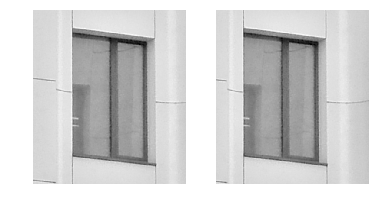

In [3]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1, cmap='gray')
axs[0].axis('off')
axs[1].imshow(img2, cmap='gray')
axs[1].axis('off')
plt.show()

In [4]:
f_img1 = fft2(img1)
f_img2 = fft2(img2)

Fourie image


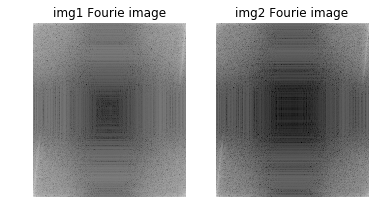

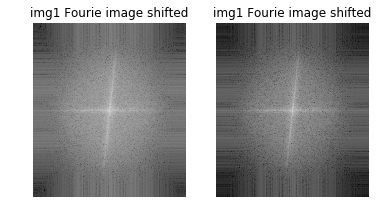

In [5]:
print('Fourie image')

fig, axs = plt.subplots(1, 2)
axs[0].imshow(
    np.log10(np.abs(f_img1)),
    cmap='gray'
)
axs[0].set_title('img1 Fourie image')
axs[0].axis('off')
axs[1].imshow(
    np.log10(np.abs(f_img2)),
    cmap='gray'
)
axs[1].set_title('img2 Fourie image')
axs[1].axis('off')
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(
    fftshift(np.log10(np.abs(f_img1))),
    cmap='gray'
)
axs[0].set_title('img1 Fourie image shifted')
axs[0].axis('off')
axs[1].imshow(
    fftshift(np.log10(np.abs(f_img2))),
    cmap='gray'
)
axs[1].set_title('img1 Fourie image shifted')
axs[1].axis('off')
plt.show()

In [10]:
f_img2_c = np.conjugate(f_img2)
crf = f_img1*f_img2_c
crf = crf / np.abs(crf) # drop off amplitude
resf = ifft2(crf).real

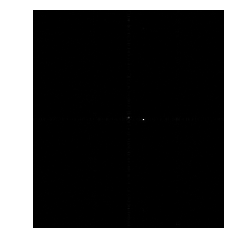

In [13]:
plt.imshow(
    fftshift(np.abs(resf)), cmap='gray'
) # np.log10()
plt.axis('off')
plt.show()

In [17]:
ccfr = fftshift(np.abs(resf))
shifted_center = np.argwhere(ccfr.max() == ccfr)[0]
shifted_center

array([201, 203])

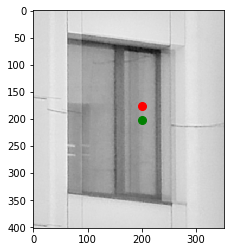

In [18]:
plt.imshow(img1, cmap='gray')
plt.imshow(img2, cmap='gray', alpha=.75)
plt.plot(img1.shape[0] // 2, img1.shape[1] // 2, 'ro', markersize=8)
plt.plot(shifted_center[0], shifted_center[1], 'go', markersize=8)
plt.show()